# *Import Libaries and data*

In [149]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as plt #used for data visualization
import matplotlib.pyplot as mplt #used for data visualizaion
from textblob import TextBlob #used for sentiment analysis
import warnings
warnings.filterwarnings('ignore')# used for igore warnings


#### Load the Dataset

In [150]:
df = pd.read_csv('C:/Users/yuvar/Downloads/Analysis_Of_Netflix_Data_Using_Python/netflix_titles.csv')

# Checking number of rows and columns in data

In [151]:
df.shape

(8807, 12)

# Checking content available in Dataset

In [152]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### How to check columns name of dataset

In [153]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### Taking the count of ratings available

In [154]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


##### Creating the Piechart based on Content rating

In [155]:
pieChart = plt.pie(x, values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

#### Preprocess the Data

In [156]:
df['description'] = df['description'].fillna('')
print(df['description'])

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object


#### Perform Sentiment Analysis

In [157]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity, blob.subjectivity

#### Create new columns for Polarity and Subjectivity

In [158]:
df['polarity'], df['subjectivity'] = zip(*df['description'].apply(analyze_sentiment))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,polarity,subjectivity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0.333333,1.000000
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.000000,0.000000
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,-0.050000,0.725000
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",-0.030505,0.318687
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.000000,0.000000


## Visualize Results
#### Plot Histogram of Polarity Scores

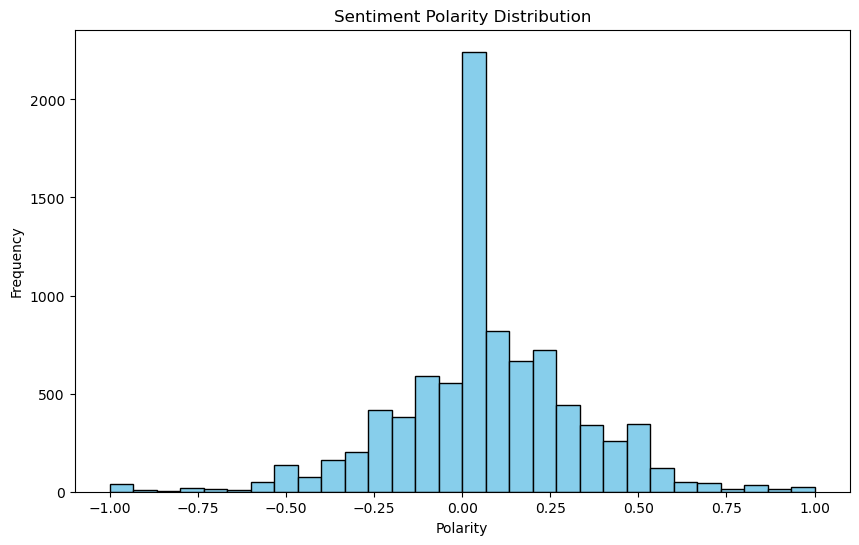

In [159]:
mplt.figure(figsize=(10, 6))
mplt.hist(df['polarity'], bins=30, color='skyblue', edgecolor='black')
mplt.title('Sentiment Polarity Distribution')
mplt.xlabel('Polarity')
mplt.ylabel('Frequency')
mplt.show()

# Insights
#### Calculate average polarity and Subjectivity 

In [160]:
average_polarity = df['polarity'].mean()
average_subjectivity = df['subjectivity'].mean()
print(f"Average Polarity: {average_polarity}")
print(f"Average Subjectivity: {average_subjectivity}")

Average Polarity: 0.06268244607642298
Average Subjectivity: 0.45130896820474514


## Analyse sentiment across different Countries

In [161]:
country_sentiment = df.groupby('country')['polarity'].mean().sort_values(ascending=False)
print("Sentiment by Country:")
print(country_sentiment)

Sentiment by Country:
country
United States, France, United Kingdom       0.900
Russia, Poland, Serbia                      0.900
United States, Hungary, Ireland, Canada     0.850
Germany, Canada, United States              0.700
South Korea, France                         0.675
                                            ...  
Finland, Germany                           -0.750
Germany, China, United Kingdom             -0.750
United Kingdom, France, Germany, Spain     -0.800
China, Spain, South Korea, United States   -1.000
United Kingdom, Jordan, Qatar, Iran        -1.000
Name: polarity, Length: 748, dtype: float64


##### Analyzing the top 5 Directors on Netflix

In [162]:
df['director']=df['director'].fillna('Director not specified')


In [163]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [164]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [165]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [166]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [167]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [168]:
directors = directors[directors.Director != 'Director not specified']

In [169]:
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [170]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

             Director  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [171]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


In [172]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = plt.bar(top5Directors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
barChart.show()